# Лабораторная работа №7,  Компьютерная геометрия и геометрическое моделирование
- Ф.И.О: **Яссин Мохамад Аламин**.
- Ноиер студ. билета: **1032205004**.
- Группа: **НКНбд-01-20**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# №1

Для начала начнем с построения графика для первого случая.

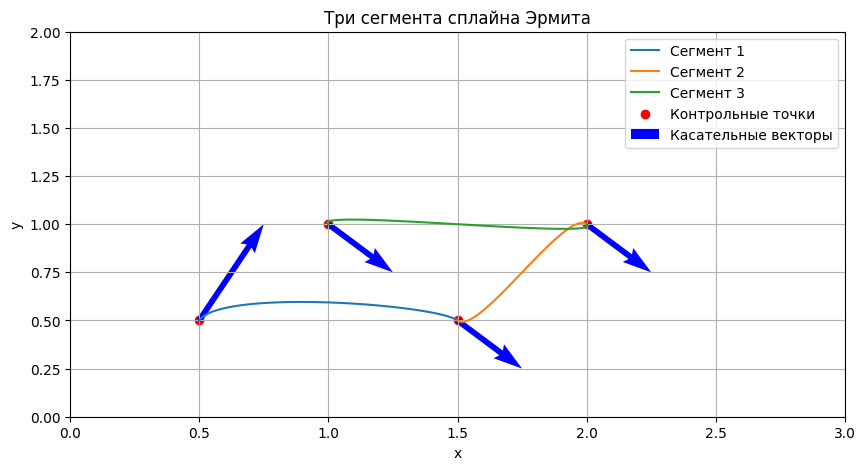

In [ ]:
# Заданные точки и касательные векторы
p0 = np.array([0.5, 0.5])
p1 = np.array([1.5, 0.5])
p2 = np.array([2.0, 1.0])
p3 = np.array([1.0, 1.0])
v0 = np.array([0.25, 0.5])
v1 = np.array([0.25, -0.25])
v2 = np.array([0.25, -0.25])
v3 = np.array([0.25, -0.25])

# Базисные полиномы
def h00(tau):
    return 2 * tau**3 - 3 * tau**2 + 1

def h10(tau):
    return tau**3 - 2 * tau**2 + tau

def h01(tau):
    return -2 * tau**3 + 3 * tau**2

def h11(tau):
    return tau**3 - tau**2

# Расчет сегментов сплайна
def r1(tau, p0, v0, p1, v1):
    return h00(tau) * p0 + h10(tau) * v0 + h01(tau) * p1 + h11(tau) * v1

def r2(tau, p1, v1, p2, v2):
    return h00(tau) * p1 + h10(tau) * v1 + h01(tau) * p2 + h11(tau) * v2

def r3(tau, p2, v2, p3, v3):
    return h00(tau) * p2 + h10(tau) * v2 + h01(tau) * p3 + h11(tau) * v3

# Расчет значений сегментов сплайна для заданных точек и касательных векторов
tau_values = np.linspace(0, 1, 100)
r1_values = np.array([r1(tau, p0, v0, p1, v1) for tau in tau_values])
r2_values = np.array([r2(tau, p1, v1, p2, v2) for tau in tau_values])
r3_values = np.array([r3(tau, p2, v2, p3, v3) for tau in tau_values])

# Построение графика

plt.figure(figsize=(10, 5))
plt.plot(r1_values[:, 0], r1_values[:, 1], label='Сегмент 1')
plt.plot(r2_values[:, 0], r2_values[:, 1], label='Сегмент 2')
plt.plot(r3_values[:, 0], r3_values[:, 1], label='Сегмент 3')
plt.scatter([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]], color='red', label='Контрольные точки')
plt.quiver([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]],
           [v0[0], v1[0], v2[0], v3[0]], [v0[1], v1[1], v2[1], v3[1]],
           angles='xy', scale_units='xy', scale=1, color='blue', label='Касательные векторы')
plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Три сегмента сплайна Эрмита')
plt.legend()
plt.grid(True)
plt.show()


# No 2

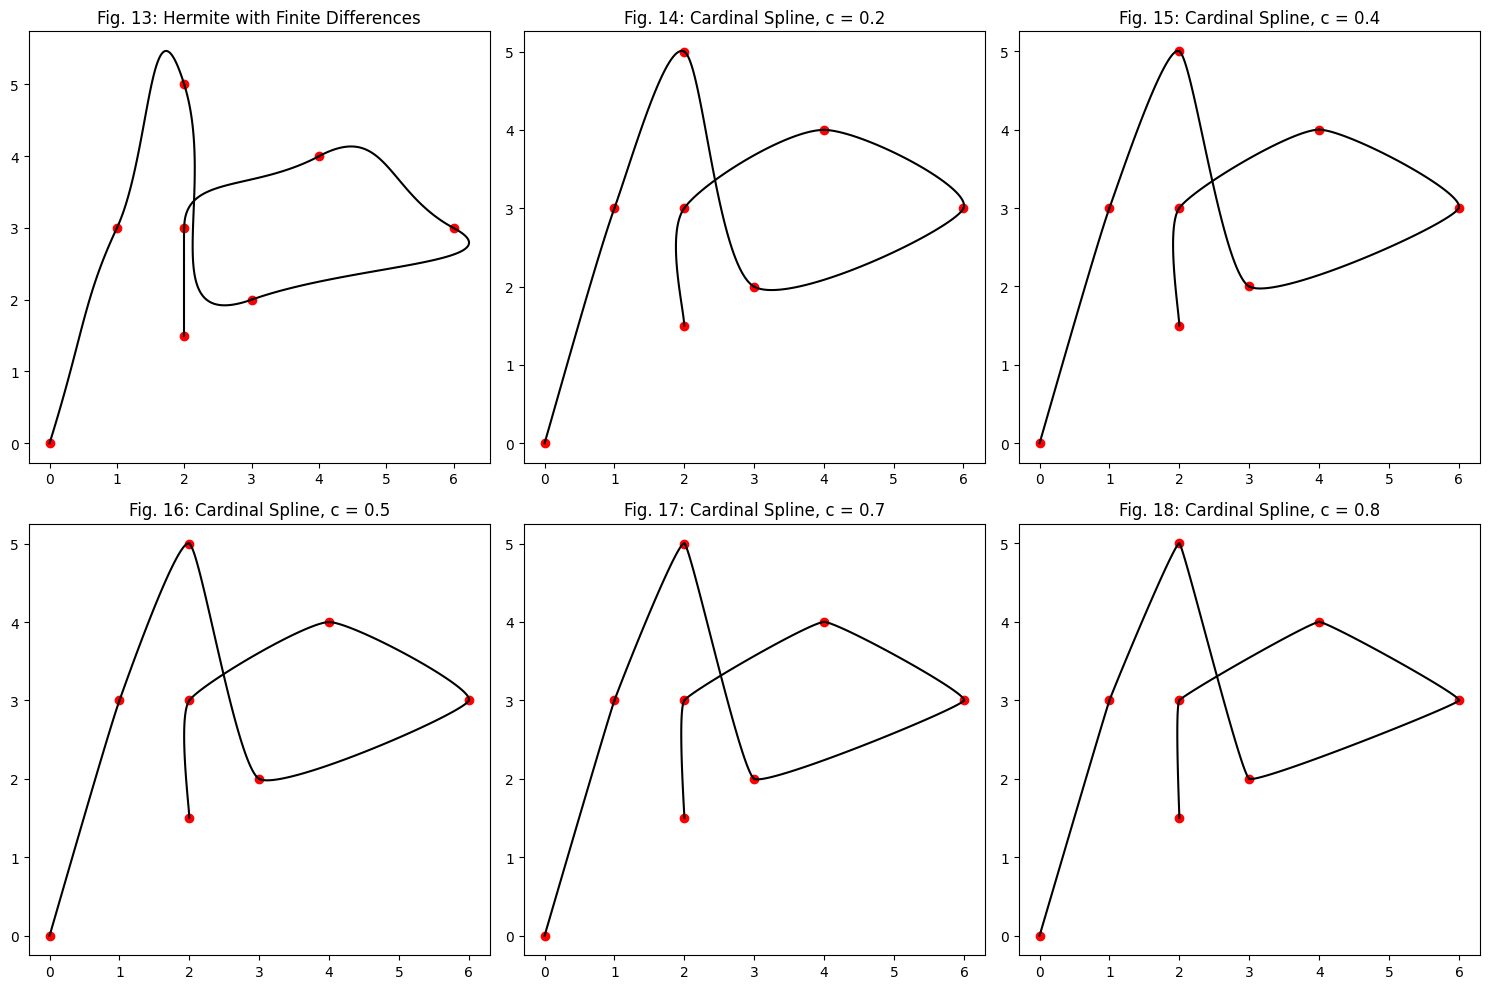

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Given points
points = np.array([(0, 0), (1, 3), (2, 5), (3, 2), (6, 3), (4, 4), (2, 3), (2, 1.5)])

# Hermite basis functions
def h00(t):
    return 2*t**3 - 3*t**2 + 1

def h10(t):
    return t**3 - 2*t**2 + t

def h01(t):
    return -2*t**3 + 3*t**2

def h11(t):
    return t**3 - t**2

# Hermite curve function
def r1(tau, p0, m0, p1, m1):
    return h00(tau) * p0 + h10(tau) * m0 + h01(tau) * p1 + h11(tau) * m1

# Cardinal tangents function as provided
def cardinal_tangents(points, c):
    tangents = []
    for i in range(len(points)):
        if i == 0:
            tangents.append((1 - c) * (points[i + 1] - points[i]) / 2)
        elif i == len(points) - 1:
            tangents.append((1 - c) * (points[i] - points[i - 1]) / 2)
        else:
            tangents.append((1 - c) * (points[i + 1] - points[i - 1]) / 2)
    return np.array(tangents)

# Drawing spline function as provided
def draw_spline(ax, points, tangents, title):
    for i in range(len(points) - 1):
        segment_values = np.array([r1(tau, points[i], tangents[i], points[i + 1], tangents[i + 1]) for tau in np.linspace(0, 1, 100)])
        ax.plot(segment_values[:, 0], segment_values[:, 1], 'black')
    ax.scatter(points[:, 0], points[:, 1], color='red')
    ax.set_title(title)

# Prepare the tangents for Hermite spline with finite differences
tangents_approx = [
    1.5 * (points[1] - points[0]),
    1.5 * (points[2] - points[1]),
    1.5 * (points[3] - points[2]),
    1.5 * (points[4] - points[3]),
    1.5 * (points[5] - points[4]),
    1.5 * (points[6] - points[5]),
    1.5 * (points[7] - points[6]),
    1.5 * (points[7] - points[6])
]

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
c_values = [0.2, 0.4, 0.5, 0.7, 0.8]

# Hermite with Finite Differences
draw_spline(axs[0, 0], points, tangents_approx, "Fig. 13: Hermite with Finite Differences")

# Cardinal Splines
for ax, c in zip(axs.flat[1:], c_values):
    tangents_cardinal = cardinal_tangents(points, c)
    draw_spline(ax, points, tangents_cardinal, f"Fig. {14 + c_values.index(c)}: Cardinal Spline, c = {c}")

plt.tight_layout()
plt.show()


Вопрос: `На что влияет параметр c?`

Параметр **c** в кардинальном сплайне определяет "поворотность" кривой. Когда **c = 1**, кардинальный сплайн становится катмулл-ромовым сплайном, который проходит через все контрольные точки без изгибов. Когда **c = 0**, кривая становится более гладкой и округлой.

# № 3

нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений, определенным способом.